In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [3]:
df = pd.read_csv('C:/Users/Prakhar/Downloads/Data_Excitel.csv')

In [4]:
df.head()

,Lead City,Sales Date,Sales Week,Leads_Created,Leads_accepted,Qualify_Confirm_Lead,Select_Partner,Install_Request,Installed
0,City 1,02-11-2017,30-10-2017,19,5,0,0,0,0
1,City 2,02-11-2017,30-10-2017,73,33,30,28,28,9
2,City 1,03-11-2017,30-10-2017,11,10,4,4,3,2
3,City 2,03-11-2017,30-10-2017,80,42,38,38,38,18
4,City 1,04-11-2017,30-10-2017,4,4,2,2,2,2


In [4]:
df1 = df.copy()
df2 = df.copy()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Lead City             7065 non-null   object
 1   Sales Date            7065 non-null   object
 2   Sales Week            7065 non-null   object
 3   Leads_Created         7065 non-null   int64 
 4   Leads_accepted        7065 non-null   int64 
 5   Qualify_Confirm_Lead  7065 non-null   int64 
 6   Select_Partner        7065 non-null   int64 
 7   Install_Request       7065 non-null   int64 
 8   Installed             7065 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 496.9+ KB


In [7]:
df1.describe()

,Leads_Created,Leads_accepted,Qualify_Confirm_Lead,Select_Partner,Install_Request,Installed
count,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000
mean,103.331352,91.370701,45.879972,32.563765,29.862562,26.465959
std,106.202860,99.852832,41.289894,28.576529,26.251149,23.718718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,13.000000,9.000000,7.000000,7.000000,6.000000
50%,72.000000,56.000000,35.000000,26.000000,24.000000,21.000000
75%,159.000000,138.000000,76.000000,53.000000,48.000000,42.000000
max,931.000000,905.000000,324.000000,284.000000,285.000000,253.000000


In [8]:
df1.isnull().sum()

Lead City               0
Sales Date              0
Sales Week              0
Leads_Created           0
Leads_accepted          0
Qualify_Confirm_Lead    0
Select_Partner          0
Install_Request         0
Installed               0
dtype: int64

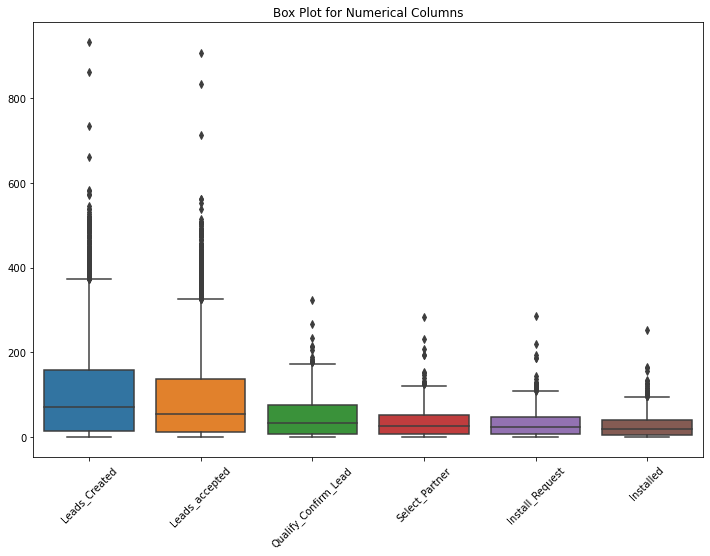

In [23]:
# Box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[['Leads_Created', 'Leads_accepted', 'Qualify_Confirm_Lead', 'Select_Partner', 'Install_Request', 'Installed']])
plt.title('Box Plot for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

## Handling Outliers

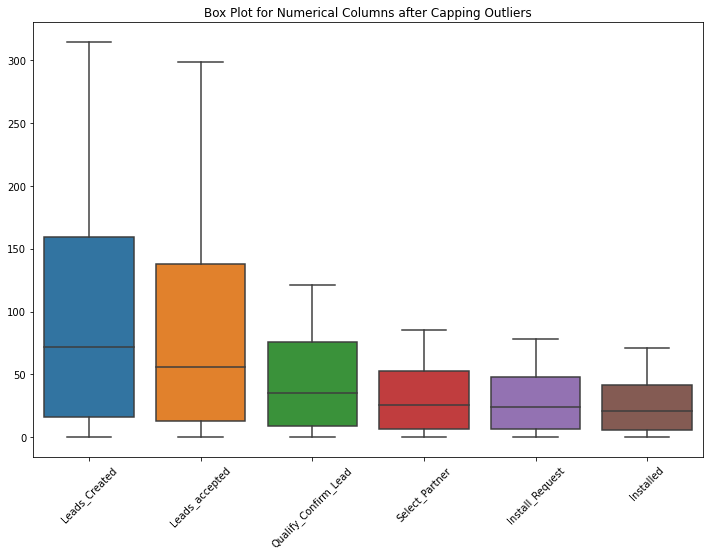

In [7]:
# Handling outliers by capping to the 95th percentile
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.95)
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)

for column in ['Leads_Created', 'Leads_accepted', 'Qualify_Confirm_Lead', 'Select_Partner', 'Install_Request', 'Installed']:
    cap_outliers(df1, column)

# Checking the effect of capping
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[['Leads_Created', 'Leads_accepted', 'Qualify_Confirm_Lead', 'Select_Partner', 'Install_Request', 'Installed']])
plt.title('Box Plot for Numerical Columns after Capping Outliers')
plt.xticks(rotation=45)
plt.show()

In [11]:
df1.describe()

,Leads_Created,Leads_accepted,Qualify_Confirm_Lead,Select_Partner,Install_Request,Installed
count,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000
mean,99.289455,87.611607,44.970559,31.903609,29.204246,25.818117
std,94.643120,88.674308,39.125737,26.831717,24.466853,21.990743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,13.000000,9.000000,7.000000,7.000000,6.000000
50%,72.000000,56.000000,35.000000,26.000000,24.000000,21.000000
75%,159.000000,138.000000,76.000000,53.000000,48.000000,42.000000
max,314.000000,298.000000,121.000000,85.000000,78.000000,71.000000


# Conversion Rates

In [20]:
# Conversion rates for each city
conversion_rates = df1.groupby('Lead City').apply(lambda x: pd.Series({
    'Leads_to_Accepted': (x['Leads_accepted'].sum() / x['Leads_Created'].sum()) * 100,
    'Accepted_to_Qualified': (x['Qualify_Confirm_Lead'].sum() / x['Leads_accepted'].sum()) * 100,
    'Qualified_to_Selected': (x['Select_Partner'].sum() / x['Qualify_Confirm_Lead'].sum()) * 100,
    'Selected_to_Requested': (x['Install_Request'].sum() / x['Select_Partner'].sum()) * 100,
    'Requested_to_Installed': (x['Installed'].sum() / x['Install_Request'].sum()) * 100,
    'Leads_to_Installed': (x['Installed'].sum() / x['Leads_Created'].sum()) * 100
}))

print(conversion_rates)

           Leads_to_Accepted  Accepted_to_Qualified  Qualified_to_Selected  \
Lead City                                                                    
City 1             93.355848              47.390181              90.881238   
City 2             88.947250              46.565334              71.772880   
City 3             85.338696              64.457114              65.759933   

           Selected_to_Requested  Requested_to_Installed  Leads_to_Installed  
Lead City                                                                     
City 1                 93.537512               90.226023           33.932961  
City 2                 92.894238               87.841757           24.257465  
City 3                 88.308454               89.108408           28.464214  


# Lead Acceptance Distribution

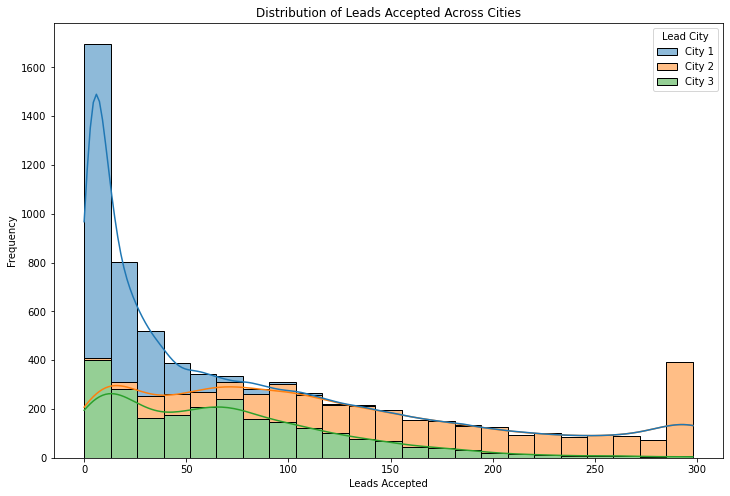

In [19]:
# Lead acceptance distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=df1, x='Leads_accepted', hue='Lead City', multiple='stack', kde=True)
plt.title('Distribution of Leads Accepted Across Cities')
plt.xlabel('Leads Accepted')
plt.ylabel('Frequency')
plt.show()

## Installations description

In [21]:
# Mean and standard deviation of installations for each city
installations_stats = df1.groupby('Lead City')['Installed'].agg(['mean', 'std'])
print(installations_stats)

# Proportion of weeks where installations fall within certain ranges
def proportion_within_range(city_data, lower_bound, upper_bound):
    return ((city_data['Installed'] >= lower_bound) & (city_data['Installed'] <= upper_bound)).mean()

proportions = df1.groupby('Lead City').apply(proportion_within_range, lower_bound=10, upper_bound=50)
print(proportions)

                mean        std
Lead City                      
City 1      6.382887   5.080449
City 2     47.143571  18.047438
City 3     23.146934  15.860522
Lead City
City 1    0.249352
City 2    0.516438
City 3    0.679727
dtype: float64


### Confidence Intervals


In [22]:
# Average installation time from lead acceptance to installation for each city
df1['Installation_Time'] = (pd.to_datetime(df1['Sales Date']) - pd.to_datetime(df1['Sales Week'])).dt.days

installation_time_stats = df1.groupby('Lead City')['Installation_Time'].agg(['mean', 'std'])
print(installation_time_stats)

# 90% confidence interval for the number of leads accepted per week
def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

lead_acceptance_ci = df1.groupby('Lead City')['Leads_accepted'].apply(confidence_interval)
print(lead_acceptance_ci)


               mean        std
Lead City                     
City 1     1.952895  88.140089
City 2     2.764877  87.747400
City 3     3.424191  87.234141
Lead City
City 1    (17.56050129645635, 16.871161352498707, 18.249...
City 2    (172.86600083229297, 170.02233588577238, 175.7...
City 3    (69.396933560477, 67.4433212025803, 71.3505459...
Name: Leads_accepted, dtype: object


## Hypothesis Testing

In [15]:
# Adding conversion rates for each row df1
df1['Leads_to_Accepted'] = (df1['Leads_accepted'] / df1['Leads_Created']) * 100
df1['Accepted_to_Qualified'] = (df1['Qualify_Confirm_Lead'] / df1['Leads_accepted']) * 100
df1['Qualified_to_Selected'] = (df1['Select_Partner'] / df1['Qualify_Confirm_Lead']) * 100
df1['Selected_to_Requested'] = (df1['Install_Request'] / df1['Select_Partner']) * 100
df1['Requested_to_Installed'] = (df1['Installed'] / df1['Install_Request']) * 100
df1['Leads_to_Installed'] = (df1['Installed'] / df1['Leads_Created']) * 100

# Replace any infinite values with NaN (arising from division by zero) and then fill NaN with 0
df1.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df1.fillna(0, inplace=True)

In [25]:
# Hypothesis testing: City Performance
conversion_rate_city1 = df1[df1['Lead City'] == 'City 1']['Leads_to_Installed']
conversion_rate_city2 = df1[df1['Lead City'] == 'City 2']['Leads_to_Installed']
conversion_rate_city3 = df1[df1['Lead City'] == 'City 3']['Leads_to_Installed']

# ANOVA test to compare means of conversion rates across cities
anova_result = stats.f_oneway(conversion_rate_city1, conversion_rate_city2, conversion_rate_city3)
print('ANOVA result:', anova_result)

# If significant, perform post-hoc tests to see which pairs of cities differ
if anova_result.pvalue < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    conversion_rates_all = pd.concat([conversion_rate_city1, conversion_rate_city2, conversion_rate_city3])
    city_labels = ['City 1']*len(conversion_rate_city1) + ['City 2']*len(conversion_rate_city2) + ['City 3']*len(conversion_rate_city3)
    tukey_result = pairwise_tukeyhsd(conversion_rates_all, city_labels)
    print(tukey_result)

ANOVA result: F_onewayResult(statistic=462.25121315640604, pvalue=2.2004026693231656e-189)
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
City 1 City 2 -25.1757 0.001 -27.1963  -23.155   True
City 1 City 3 -19.1447 0.001  -21.177 -17.1125   True
City 2 City 3   6.0309 0.001   4.0177   8.0441   True
-----------------------------------------------------


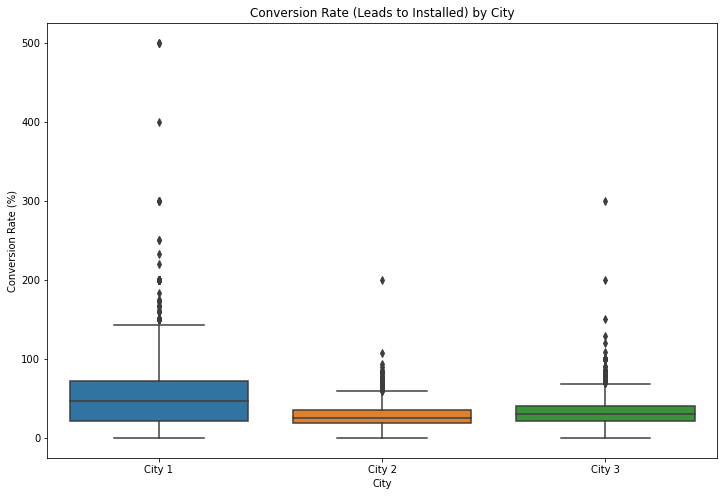

In [26]:
# Plotting conversion rates for each city
plt.figure(figsize=(12, 8))
sns.boxplot(x='Lead City', y='Leads_to_Installed', data=df1)
plt.title('Conversion Rate (Leads to Installed) by City')
plt.xlabel('City')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Correlation and Regression

                      Leads_Created  Leads_accepted  Qualify_Confirm_Lead  \
Leads_Created              1.000000        0.983993              0.801406   
Leads_accepted             0.983993        1.000000              0.759395   
Qualify_Confirm_Lead       0.801406        0.759395              1.000000   
Select_Partner             0.790937        0.742753              0.964955   
Install_Request            0.791549        0.743151              0.956201   
Installed                  0.778624        0.737611              0.924650   

                      Select_Partner  Install_Request  Installed  
Leads_Created               0.790937         0.791549   0.778624  
Leads_accepted              0.742753         0.743151   0.737611  
Qualify_Confirm_Lead        0.964955         0.956201   0.924650  
Select_Partner              1.000000         0.992814   0.955554  
Install_Request             0.992814         1.000000   0.961738  
Installed                   0.955554         0.961738   1.

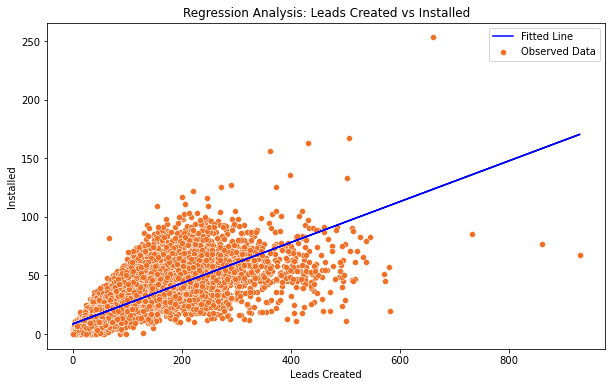

In [8]:
# Correlation matrix
correlation_matrix = df1[['Leads_Created', 'Leads_accepted', 'Qualify_Confirm_Lead', 'Select_Partner', 'Install_Request', 'Installed']].corr()
print(correlation_matrix)

# Linear regression model
X = df1['Leads_Created']
y = df1['Installed']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

# Plotting the regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['Leads_Created'], y=df1['Installed'], color='#f17025', label='Observed Data')
plt.plot(df1['Leads_Created'], predictions, color='blue', label='Fitted Line')

# Adding labels and title
plt.xlabel('Leads Created')
plt.ylabel('Installed')
plt.title('Regression Analysis: Leads Created vs Installed')
plt.legend()


                            OLS Regression Results                            
Dep. Variable:              Installed   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.088e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:15:54   Log-Likelihood:                -29101.
No. Observations:                7065   AIC:                         5.821e+04
Df Residuals:                    7063   BIC:                         5.822e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.4973      0.247     34.391

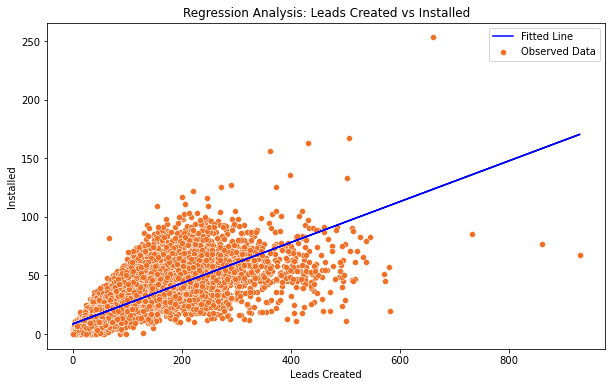

In [10]:
# Prepare data for OLS regression
X = df['Leads_Created']
y = df['Installed']

X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

print(model.summary())


# Plotting the regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Leads_Created'], y=df['Installed'], color='#f17025', label='Observed Data')
plt.plot(df['Leads_Created'], predictions, color='blue', label='Fitted Line')

# Adding labels and title
plt.xlabel('Leads Created')
plt.ylabel('Installed')
plt.title('Regression Analysis: Leads Created vs Installed')
plt.legend()

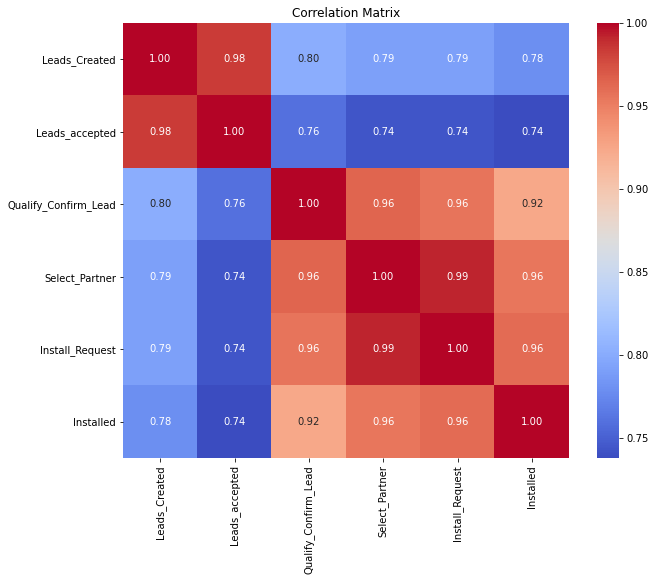

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [35]:
def calculate_confidence_interval(data, confidence=0.95):
    data_mean = np.mean(data)
    data_std = np.std(data, ddof=1)
    n = len(data)
    z_score = 1.96  # for 95% confidence
    margin_of_error = z_score * (data_std / np.sqrt(n))
    return (data_mean - margin_of_error, data_mean + margin_of_error)

# Apply to Leads_accepted for each city
ci_city1 = calculate_confidence_interval(df_city1['Leads_accepted'])
ci_city2 = calculate_confidence_interval(df_city2['Leads_accepted'])
ci_city3 = calculate_confidence_interval(df_city3['Leads_accepted'])

print('Confidence Interval for City 1:', ci_city1)
print('Confidence Interval for City 2:', ci_city2)
print('Confidence Interval for City 3:', ci_city3)

Confidence Interval for City 1: (16.739415984360797, 18.381586608551906)
Confidence Interval for City 2: (179.54791001801183, 188.0775581467822)
Confidence Interval for City 3: (67.157907946277, 71.85146173004325)


In [34]:
df_city1 = df[df['Lead City'] == 'City 1']
df_city2 = df[df['Lead City'] == 'City 2']
df_city3 = df[df['Lead City'] == 'City 3']

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead City             7065 non-null   object 
 1   Sales Date            7065 non-null   object 
 2   Sales Week            7065 non-null   object 
 3   Leads_Created         7065 non-null   float64
 4   Leads_accepted        7065 non-null   float64
 5   Qualify_Confirm_Lead  7065 non-null   float64
 6   Select_Partner        7065 non-null   float64
 7   Install_Request       7065 non-null   float64
 8   Installed             7065 non-null   float64
dtypes: float64(6), object(3)
memory usage: 496.9+ KB


In [11]:
df1['Sales Week'] = pd.to_datetime(df1['Sales Week'], format='%d-%m-%Y')
df1['Year'] = df1['Sales Week'].dt.year
df1['Month'] = df1['Sales Week'].dt.month

In [12]:
df1.head()

,Lead City,Sales Date,Sales Week,Leads_Created,Leads_accepted,Qualify_Confirm_Lead,Select_Partner,Install_Request,Installed,Year,Month
0,City 1,02-11-2017,2017-10-30,19.0,5.0,0.0,0.0,0.0,0.0,2017,10
1,City 2,02-11-2017,2017-10-30,73.0,33.0,30.0,28.0,28.0,9.0,2017,10
2,City 1,03-11-2017,2017-10-30,11.0,10.0,4.0,4.0,3.0,2.0,2017,10
3,City 2,03-11-2017,2017-10-30,80.0,42.0,38.0,38.0,38.0,18.0,2017,10
4,City 1,04-11-2017,2017-10-30,4.0,4.0,2.0,2.0,2.0,2.0,2017,10


In [13]:
df1['Leads_to_Accepted'] = (df1['Leads_accepted'] / df1['Leads_Created']) * 100
df1['Accepted_to_Qualified'] = (df1['Qualify_Confirm_Lead'] / df1['Leads_accepted']) * 100
df1['Qualified_to_Selected'] = (df1['Select_Partner'] / df1['Qualify_Confirm_Lead']) * 100
df1['Selected_to_Requested'] = (df1['Install_Request'] / df1['Select_Partner']) * 100
df1['Requested_to_Installed'] = (df1['Installed'] / df1['Install_Request']) * 100
df1['Leads_to_Installed'] = (df1['Installed'] / df1['Leads_Created']) * 100

monthly_conversion_rates = df1.groupby(['Lead City', 'Year', 'Month']).mean()

yearly_conversion_rates = df1.groupby(['Lead City', 'Year']).mean()

print(monthly_conversion_rates)
print(yearly_conversion_rates)

                      Leads_Created  Leads_accepted  Qualify_Confirm_Lead  \
Lead City Year Month                                                        
City 1    2017 10          9.500000        5.250000              2.000000   
               11          8.115385        3.230769              2.538462   
               12          5.235294        4.588235              1.823529   
          2018 1          11.846154       11.230769              3.846154   
               2           7.375000        6.625000              2.500000   
...                             ...             ...                   ...   
City 3    2024 1         101.971429       96.542857             64.857143   
               2         115.214286      108.392857             61.714286   
               3          92.035714       84.107143             58.500000   
               4         124.828571      118.885714             63.200000   
               5         101.269231       96.500000             55.923077   

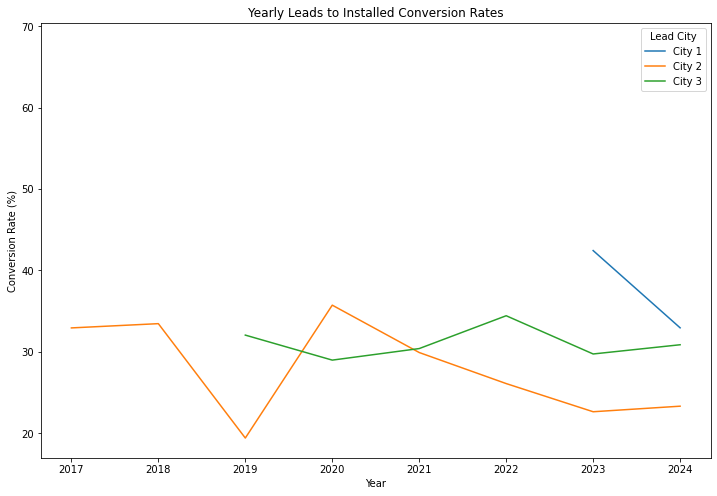

In [15]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=monthly_conversion_rates.reset_index(), x='Month', y='Leads_to_Installed', hue='Lead City', style='Year')
# plt.title('Monthly Leads to Installed Conversion Rates')
# plt.ylabel('Conversion Rate (%)')
# plt.show()


plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_conversion_rates.reset_index(), x='Year', y='Leads_to_Installed', hue='Lead City')
plt.title('Yearly Leads to Installed Conversion Rates')
plt.ylabel('Conversion Rate (%)')
plt.show()

### CART Analysis

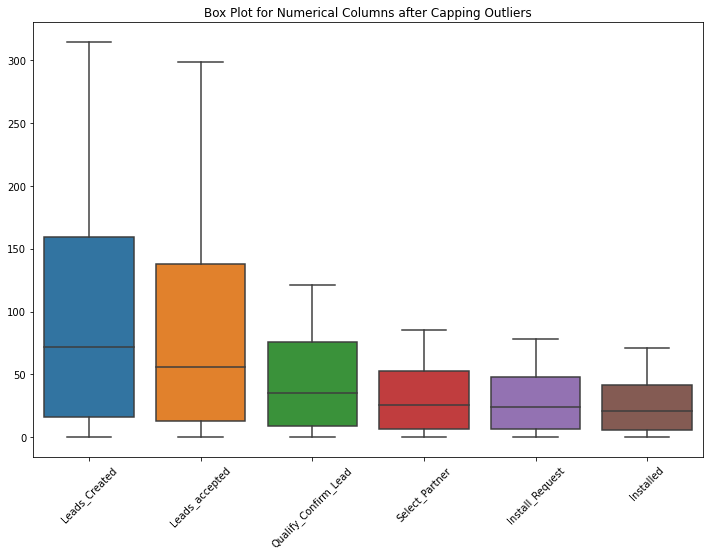

In [5]:
# Handling outliers by capping to the 95th percentile
def cap_outliers(df2, column):
    upper_limit = df2[column].quantile(0.95)
    df2[column] = df2[column].apply(lambda x: upper_limit if x > upper_limit else x)

for column in ['Leads_Created', 'Leads_accepted', 'Qualify_Confirm_Lead', 'Select_Partner', 'Install_Request', 'Installed']:
    cap_outliers(df2, column)

# Checking the effect of capping
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2[['Leads_Created', 'Leads_accepted', 'Qualify_Confirm_Lead', 'Select_Partner', 'Install_Request', 'Installed']])
plt.title('Box Plot for Numerical Columns after Capping Outliers')
plt.xticks(rotation=45)
plt.show()

[[37  4  4 ...  0  0  0]
 [ 1 63 12 ...  0  0  0]
 [ 0  0 62 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  5]
 [ 0  0  0 ...  0  0 79]]
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86        48
         1.0       0.94      0.75      0.83        84
         2.0       0.74      0.70      0.72        89
         3.0       0.41      0.71      0.52        82
         4.0       0.00      0.00      0.00        79
         5.0       0.25      0.84      0.38        80
         6.0       0.00      0.00      0.00        55
         7.0       0.00      0.00      0.00        58
         8.0       0.00      0.00      0.00        62
         9.0       0.00      0.00      0.00        33
        10.0       0.00      0.00      0.00        49
        11.0       0.00      0.00      0.00        49
        12.0       0.02      1.00      0.05        32
        13.0       0.00      0.00      0.00        34
        14.0       0.00      0.00

C:\Users\Prakhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: list index out of range

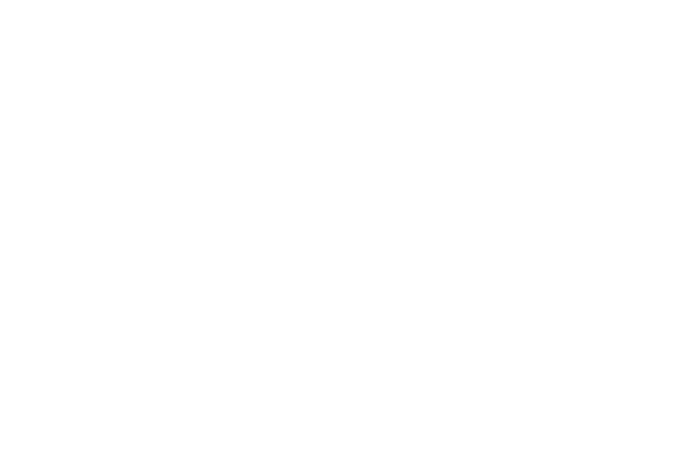

In [13]:
# Define features and target variable
X = df2[['Leads_Created', 'Leads_accepted', 'Qualify_Confirm_Lead']]
y = df2['Install_Request']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
cart_model = DecisionTreeClassifier(max_depth=3, random_state=42)
cart_model.fit(X_train, y_train)

# Predictions
y_pred = cart_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(12,8))
tree.plot_tree(cart_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [21]:
df2.head()

,Lead City,Sales Date,Sales Week,Leads_Created,Leads_accepted,Qualify_Confirm_Lead,Select_Partner,Install_Request,Installed
0,City 1,02-11-2017,30-10-2017,19.0,5.0,0.0,0.0,0.0,0.0
1,City 2,02-11-2017,30-10-2017,73.0,33.0,30.0,28.0,28.0,9.0
2,City 1,03-11-2017,30-10-2017,11.0,10.0,4.0,4.0,3.0,2.0
3,City 2,03-11-2017,30-10-2017,80.0,42.0,38.0,38.0,38.0,18.0
4,City 1,04-11-2017,30-10-2017,4.0,4.0,2.0,2.0,2.0,2.0


In [29]:
df2['Sales Date'] = pd.to_datetime(df2['Sales Date'], format='%d-%m-%Y', errors='coerce')

# Check if conversion was successful
print(df2['Sales Date'].head())
print(df2.dtypes)

# Extract year if conversion was successful
if pd.api.types.is_datetime64_any_dtype(df['Sales Date']):
    df2['Year'] = df2['Sales Date'].dt.year
else:
    raise ValueError("Conversion to datetime failed or 'Sales Date' is not in datetime format")

# Calculate conversion percentages
conversion_stages = [
    ('Leads_Created', 'Leads_accepted'),
    ('Leads_accepted', 'Qualify_Confirm_Lead'),
    ('Qualify_Confirm_Lead', 'Select_Partner'),
    ('Select_Partner', 'Install_Request'),
    ('Install_Request', 'Installed')
]

conversion_results = []

for city in df2['Lead City'].unique():
    for year in df['Year'].unique():
        city_year_df = df2[(df2['Lead City'] == city) & (df2['Year'] == year)]
        
        for stage_start, stage_end in conversion_stages:
            if city_year_df[stage_start].sum() == 0:
                conversion_percentage = 0
            else:
                conversion_percentage = (city_year_df[stage_end].sum() / city_year_df[stage_start].sum()) * 100
            
            conversion_results.append({
                'Lead City': city,
                'Year': year,
                'Stage Start': stage_start,
                'Stage End': stage_end,
                'Conversion %': conversion_percentage
            })

# Convert results to DataFrame
conversion_df = pd.DataFrame(conversion_results)

# Pivot table to get conversion percentages in a more readable format
pivot_df = conversion_df.pivot_table(index=['Lead City', 'Year'], columns='Stage Start', values='Conversion %')

print(pivot_df)


# Check for any rows with invalid date formats
print(df2[~pd.to_datetime(df2['Sales Date'], format='%d-%m-%Y', errors='coerce').notna()])

# Convert 'Sales Date' to datetime format with error coercion
df2['Sales Date'] = pd.to_datetime(df2['Sales Date'], format='%d-%m-%Y', errors='coerce')


0   2017-11-02
1   2017-11-02
2   2017-11-03
3   2017-11-03
4   2017-11-04
Name: Sales Date, dtype: datetime64[ns]
Lead City                       object
Sales Date              datetime64[ns]
Sales Week              datetime64[ns]
Leads_Created                    int64
Leads_accepted                   int64
Qualify_Confirm_Lead             int64
Select_Partner                   int64
Install_Request                  int64
Installed                        int64
Year                             int64
Month                            int64
dtype: object


ValueError: Conversion to datetime failed or 'Sales Date' is not in datetime format

In [10]:
unique_classes = y.unique()
print(unique_classes)

[ 0. 28.  3. 38.  2. 63.  1. 54. 34. 32.  5. 40. 25. 46. 41.  7. 42.  4.
 31. 35. 30. 13.  6. 33. 29. 39. 37. 61. 65. 36. 51. 45. 48. 43. 59. 53.
 56. 68.  8. 52. 26. 11. 21. 19. 24. 27. 57. 14.  9. 49. 64. 78. 18. 22.
 16. 17. 20. 12. 23. 10. 15. 47. 50. 44. 58. 70. 62. 67. 55. 71. 77. 74.
 66. 60. 69. 75. 76. 72. 73.]


In [11]:
class_names = [str(cls) for cls in unique_classes]

[ 0. 28.  3. 38.  2. 63.  1. 54. 34. 32.  5. 40. 25. 46. 41.  7. 42.  4.
 31. 35. 30. 13.  6. 33. 29. 39. 37. 61. 65. 36. 51. 45. 48. 43. 59. 53.
 56. 68.  8. 52. 26. 11. 21. 19. 24. 27. 57. 14.  9. 49. 64. 78. 18. 22.
 16. 17. 20. 12. 23. 10. 15. 47. 50. 44. 58. 70. 62. 67. 55. 71. 77. 74.
 66. 60. 69. 75. 76. 72. 73.]


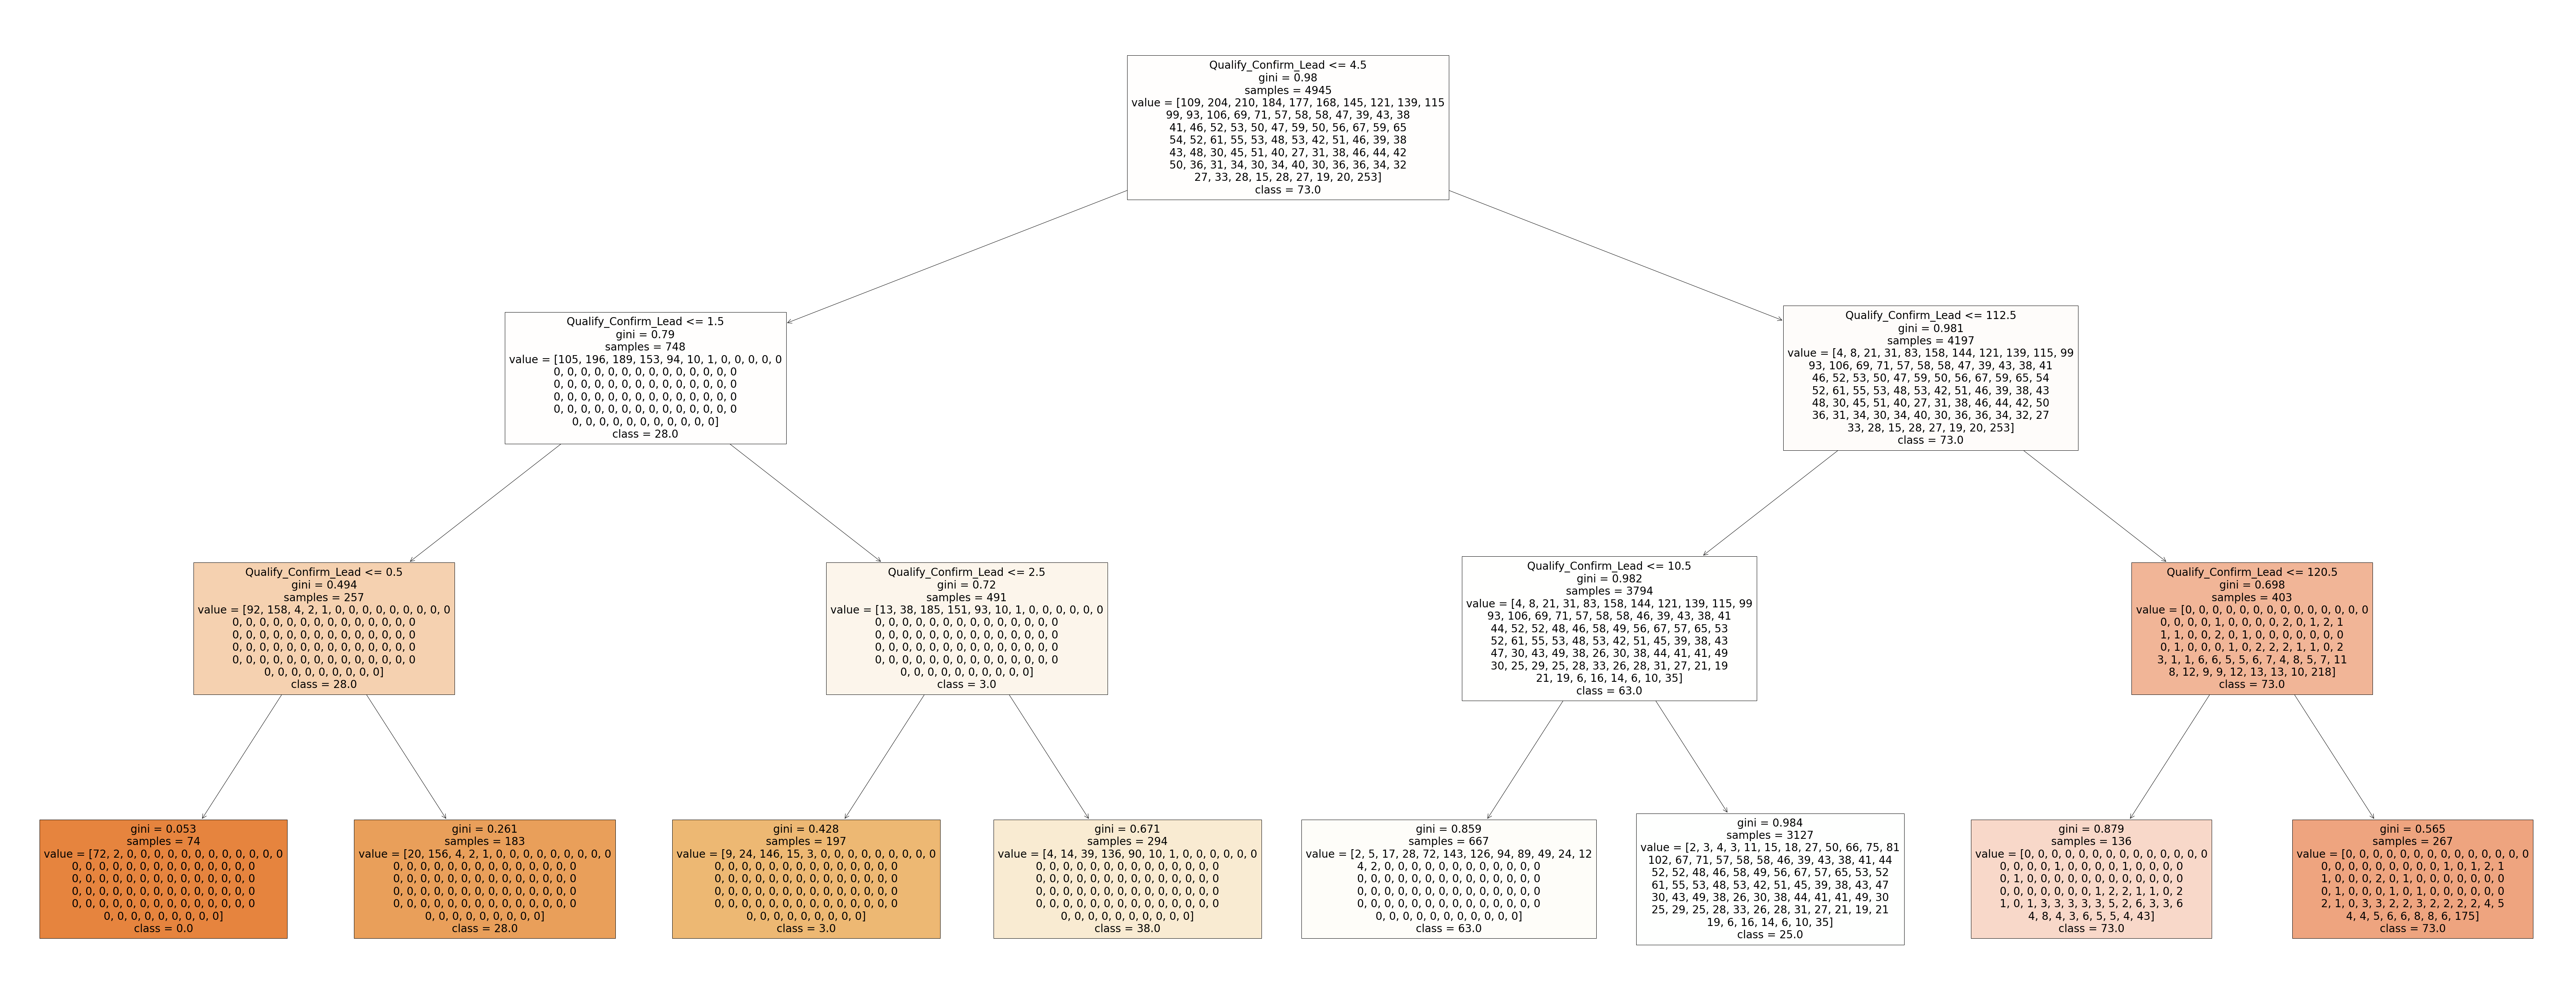

In [21]:
unique_classes = y.unique()
print(unique_classes)

# Dynamically generate class names
class_names = [str(cls) for cls in unique_classes]

# Visualize the tree
plt.figure(figsize=(120,48))
tree.plot_tree(cart_model, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [25]:
pip install pyDEA


  Created wheel for xlwt-future: filename=xlwt_future-0.8.0-py3-none-any.whl size=3258152 sha256=b409f17be7e0335a4c327b0a6971a2581d829c246883fc319e751e63bc1a6552
  Stored in directory: c:\users\prakhar\appdata\local\pip\cache\wheels\99\fa\33\41ac3ed0b9e4dcb1aa6b4f6a56f037d9a9f071c7355d519e56
Successfully built xlwt-future
Note: you may need to restart the kernel to use updated packages.


In [24]:
# Prepare the data for DEA
dea_data = df2.groupby('Lead City').agg({
    'Leads_Created': 'sum',
    'Leads_accepted': 'sum',
    'Install_Request': 'sum',
    'Installed': 'sum'
}).reset_index()

# Define input and output variables
input_vars = ['Leads_Created', 'Leads_accepted']
output_vars = ['Install_Request', 'Installed']

# Function for a simplified DEA analysis
def dea_analysis(data, input_vars, output_vars):
    # Calculate input and output sums
    inputs = data[input_vars].values
    outputs = data[output_vars].values
    
    # Calculate efficiency (outputs/inputs)
    efficiency_scores = np.dot(outputs, np.ones(outputs.shape[1])) / np.dot(inputs, np.ones(inputs.shape[1]))
    data['Efficiency'] = efficiency_scores
    
    # Identifying the most efficient (efficiency score = 1)
    data['Efficiency'] = data['Efficiency'] / data['Efficiency'].max()  # Normalize to get scores between 0 and 1
    return data

# Run DEA analysis
results = dea_analysis(dea_data, input_vars, output_vars)

# Display results
print(results)


  Lead City  Leads_Created  Leads_accepted  Install_Request  Installed  \
0    City 1          43527           40635            16370      14770   
1    City 2         494877          441702           133562     117789   
2    City 3         191632          163197            61047      54423   

   Efficiency  
0    1.000000  
1    0.725327  
2    0.879524  


In [30]:
df2['Sales Week'] = pd.to_datetime(df2['Sales Week'], format='%d-%m-%Y')
df2['Year'] = df2['Sales Week'].dt.year
df2['Month'] = df2['Sales Week'].dt.month

In [33]:
dea_data = df2.groupby(['Year','Lead City']).agg({
    'Leads_Created': 'sum',
    'Leads_accepted': 'sum',
    'Install_Request': 'sum',
    'Installed': 'sum'
}).reset_index()

# Define input and output variables
input_vars = ['Leads_Created', 'Leads_accepted']
output_vars = ['Install_Request', 'Installed']

# Function for a simplified DEA analysis
def dea_analysis(data, input_vars, output_vars):
    # Normalize inputs and outputs to handle different scales
    inputs = data[input_vars].values
    outputs = data[output_vars].values
    
    # Efficiency calculation (simplified)
    input_sums = np.sum(inputs, axis=1)
    output_sums = np.sum(outputs, axis=1)
    
    efficiency_scores = output_sums / input_sums
    data['Efficiency'] = efficiency_scores
    
    # Normalize efficiency scores to get values between 0 and 1
    data['Efficiency'] = data['Efficiency'] / data['Efficiency'].max()  # Normalize to get scores between 0 and 1
    return data

# Run DEA analysis
results = dea_analysis(dea_data, input_vars, output_vars)

# Display results
print(results)

    Year Lead City  Leads_Created  Leads_accepted  Install_Request  Installed  \
0   2017    City 1            338             183              101         86   
1   2017    City 2           7153            5032             2378       1920   
2   2017    City 3            106              69               62         58   
3   2018    City 1           2422            2166              736        632   
4   2018    City 2          39957           33785            10486       9028   
5   2018    City 3           3510            2206             1205       1054   
6   2019    City 1           3679            3458             1027        954   
7   2019    City 2          72643           66849            14122      12718   
8   2019    City 3          10214            7277             3374       3054   
9   2020    City 1           2936            2684             2016       1852   
10  2020    City 2          57141           41839            23610      20729   
11  2020    City 3          

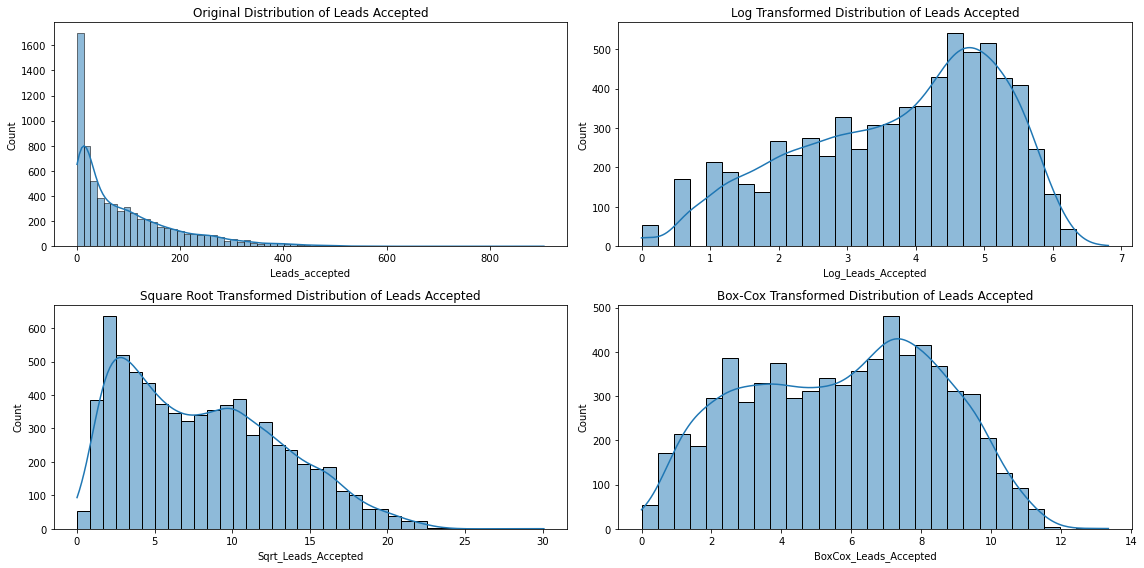

In [7]:
# Assuming your data is in a DataFrame df1 and the column to normalize is 'Leads_accepted'

# Log Transformation
df1['Log_Leads_Accepted'] = np.log1p(df1['Leads_accepted'])  # log1p used to avoid log(0)

# Square Root Transformation
df1['Sqrt_Leads_Accepted'] = np.sqrt(df1['Leads_accepted'])

# Box-Cox Transformation (requires all positive values)
from scipy.stats import boxcox

# Shift data if necessary to ensure all values are positive
shifted_leads_accepted = df1['Leads_accepted'] - df1['Leads_accepted'].min() + 1
df1['BoxCox_Leads_Accepted'], fitted_lambda = boxcox(shifted_leads_accepted)

# Plot the transformed distributions
plt.figure(figsize=(16, 8))

# Original Distribution
plt.subplot(2, 2, 1)
sns.histplot(df1['Leads_accepted'], kde=True)
plt.title('Original Distribution of Leads Accepted')

# Log Transformed Distribution
plt.subplot(2, 2, 2)
sns.histplot(df1['Log_Leads_Accepted'], kde=True)
plt.title('Log Transformed Distribution of Leads Accepted')

# Square Root Transformed Distribution
plt.subplot(2, 2, 3)
sns.histplot(df1['Sqrt_Leads_Accepted'], kde=True)
plt.title('Square Root Transformed Distribution of Leads Accepted')

# Box-Cox Transformed Distribution
plt.subplot(2, 2, 4)
sns.histplot(df1['BoxCox_Leads_Accepted'], kde=True)
plt.title('Box-Cox Transformed Distribution of Leads Accepted')

plt.tight_layout()
plt.show()

In [11]:
# Correlation Analysis with Transformed Data
correlation_log = df1['Log_Leads_Accepted'].corr(df1['Leads_accepted'])
correlation_sqrt = df1['Sqrt_Leads_Accepted'].corr(df1['Leads_accepted'])
correlation_boxcox = df1['BoxCox_Leads_Accepted'].corr(df1['Leads_accepted'])

print(f"Correlation with Log Transformed Data: {correlation_log}")
print(f"Correlation with Square Root Transformed Data: {correlation_sqrt}")
print(f"Correlation with Box-Cox Transformed Data: {correlation_boxcox}")

Correlation with Log Transformed Data: 0.8272925377871536
Correlation with Square Root Transformed Data: 0.9591298360232998
Correlation with Box-Cox Transformed Data: 0.8876028328126865


In [14]:
# Regression Example with Transformed Data
import statsmodels.api as sm

X = sm.add_constant(df1[['Log_Leads_Accepted']])
y = df1['Leads_accepted']

model = sm.OLS(y, X).fit()
print(model.summary())

# Alternatively, using scikit-learn for regression
from sklearn.linear_model import LinearRegression

# For Log Transformed Data
X = df1[['Log_Leads_Accepted']]
y = df1['Leads_accepted']

regressor = LinearRegression()
regressor.fit(X, y)
print(f"Regression Coefficients: {regressor.coef_}")
print(f"Regression Intercept: {regressor.intercept_}")

                            OLS Regression Results                            
Dep. Variable:         Leads_accepted   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                 1.532e+04
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:17:16   Log-Likelihood:                -38475.
No. Observations:                7065   AIC:                         7.695e+04
Df Residuals:                    7063   BIC:                         7.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -123.4023      1

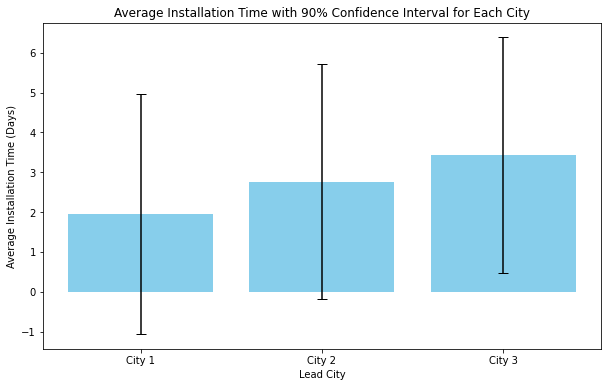

In [15]:
df1['Installation_Time'] = (pd.to_datetime(df1['Sales Date']) - pd.to_datetime(df1['Sales Week'])).dt.days

# Group by 'Lead City' to get mean and standard deviation of 'Installation_Time'
installation_time_stats = df1.groupby('Lead City')['Installation_Time'].agg(['mean', 'std', 'count'])

# Calculate the 90% confidence interval
confidence_level = 0.90
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

installation_time_stats['margin_of_error'] = z_score * (installation_time_stats['std'] / np.sqrt(installation_time_stats['count']))
installation_time_stats['lower_bound'] = installation_time_stats['mean'] - installation_time_stats['margin_of_error']
installation_time_stats['upper_bound'] = installation_time_stats['mean'] + installation_time_stats['margin_of_error']

# Plotting the mean installation time with confidence intervals
plt.figure(figsize=(10, 6))
plt.bar(installation_time_stats.index, installation_time_stats['mean'], yerr=installation_time_stats['margin_of_error'], capsize=5, color='skyblue')
plt.xlabel('Lead City')
plt.ylabel('Average Installation Time (Days)')
plt.title('Average Installation Time with 90% Confidence Interval for Each City')
plt.show()

KeyError: 'Lead City'

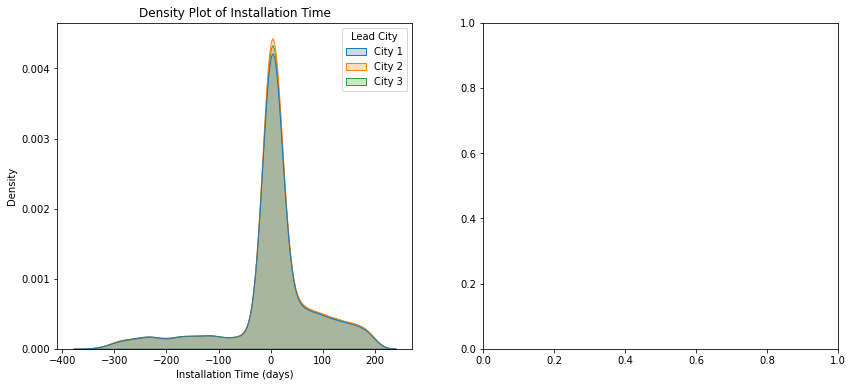

In [24]:
# Plot density plots
plt.figure(figsize=(14, 6))

# Density plot for Installation Time
plt.subplot(1, 2, 1)
sns.kdeplot(data=df1, x='Installation_Time', hue='Lead City', fill=True)
plt.title('Density Plot of Installation Time')
plt.xlabel('Installation Time (days)')
plt.ylabel('Density')

# Density plot for Confidence Intervals
plt.subplot(1, 2, 2)
for city in installation_time_stats['Lead City'].unique():
    city_data = installation_time_stats[installation_time_stats['Lead City'] == city]
    plt.fill_betweenx(
        y=[0, 1],
        x1=city_data['lower_ci'].values[0],
        x2=city_data['upper_ci'].values[0],
        label=f'{city} CI'
    )
plt.title('90% Confidence Interval for Leads Accepted')
plt.xlabel('Leads Accepted')
plt.ylabel('Density')
plt.legend(title='Cities')

plt.tight_layout()
plt.show()

In [18]:
installation_time_stats.columns

Index(['mean', 'std', 'count', 'margin_of_error', 'lower_bound',
       'upper_bound'],
      dtype='object')

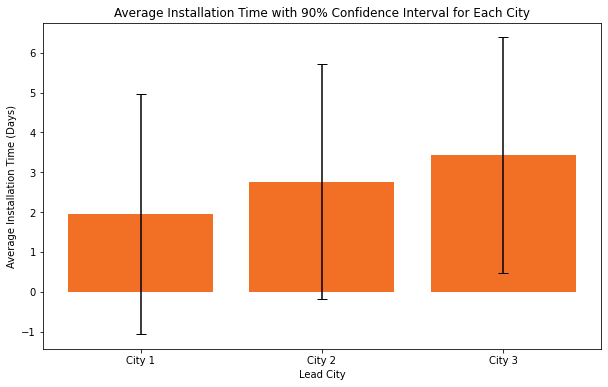

In [5]:
df1['Installation_Time'] = (pd.to_datetime(df1['Sales Date']) - pd.to_datetime(df1['Sales Week'])).dt.days

# Group by 'Lead City' to get mean and standard deviation of 'Installation_Time'
installation_time_stats = df1.groupby('Lead City')['Installation_Time'].agg(['mean', 'std', 'count'])

# Calculate the 90% confidence interval
confidence_level = 0.90
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

installation_time_stats['margin_of_error'] = z_score * (installation_time_stats['std'] / np.sqrt(installation_time_stats['count']))
installation_time_stats['lower_bound'] = installation_time_stats['mean'] - installation_time_stats['margin_of_error']
installation_time_stats['upper_bound'] = installation_time_stats['mean'] + installation_time_stats['margin_of_error']

plt.figure(figsize=(10, 6))
plt.bar(installation_time_stats.index, installation_time_stats['mean'], yerr=installation_time_stats['margin_of_error'], capsize=5, color='#1f4c9f')
plt.xlabel('Lead City')
plt.ylabel('Average Installation Time (Days)')
plt.title('Average Installation Time with 90% Confidence Interval for Each City')
plt.show()

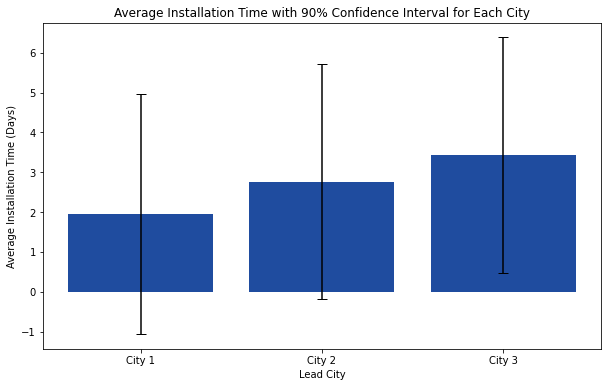

In [6]:
df1['Installation_Time'] = (pd.to_datetime(df1['Sales Date']) - pd.to_datetime(df1['Sales Week'])).dt.days

# Group by 'Lead City' to get mean and standard deviation of 'Installation_Time'
installation_time_stats = df1.groupby('Lead City')['Installation_Time'].agg(['mean', 'std', 'count'])

# Calculate the 90% confidence interval
confidence_level = 0.90
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

installation_time_stats['margin_of_error'] = z_score * (installation_time_stats['std'] / np.sqrt(installation_time_stats['count']))
installation_time_stats['lower_bound'] = installation_time_stats['mean'] - installation_time_stats['margin_of_error']
installation_time_stats['upper_bound'] = installation_time_stats['mean'] + installation_time_stats['margin_of_error']

plt.figure(figsize=(10, 6))
plt.bar(installation_time_stats.index, installation_time_stats['mean'], yerr=installation_time_stats['margin_of_error'], capsize=5, color='#1f4c9f')
plt.xlabel('Lead City')
plt.ylabel('Average Installation Time (Days)')
plt.title('Average Installation Time with 90% Confidence Interval for Each City')
plt.show()

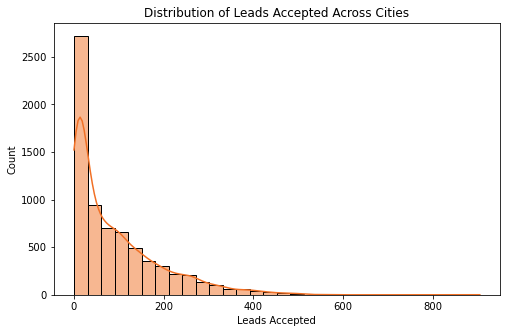

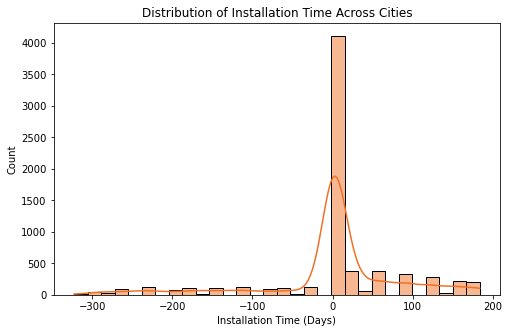

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Lead Acceptance
plt.figure(figsize=(8, 5))
sns.histplot(df1['Leads_accepted'], kde=True, bins=30, color='#f17025')
plt.title('Distribution of Leads Accepted Across Cities')
plt.xlabel('Leads Accepted')
plt.ylabel('Count')
plt.show()

# Histogram of Installation Time
plt.figure(figsize=(8, 5))
sns.histplot(df1['Installation_Time'], kde=True, bins=30, color='#f17025')
plt.title('Distribution of Installation Time Across Cities')
plt.xlabel('Installation Time (Days)')
plt.ylabel('Count')
plt.show()


ANOVA result: F_onewayResult(statistic=450.14353720875295, pvalue=9.980945287417072e-185)
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
City 1 City 2 -24.8984 0.001 -26.9289  -22.868   True
City 1 City 3  -19.144 0.001 -21.1861 -17.1019   True
City 2 City 3   5.7544 0.001   3.7315   7.7774   True
-----------------------------------------------------


C:\Users\Prakhar\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


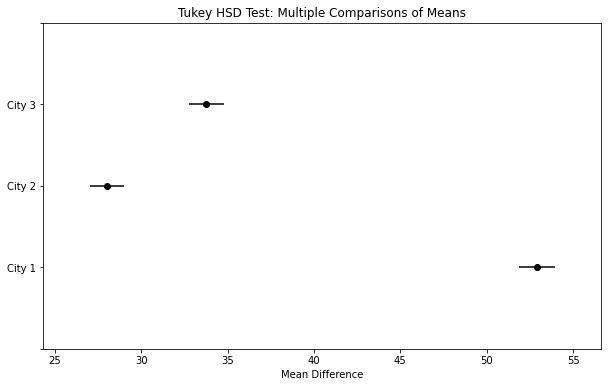

In [16]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Filter conversion rates by city
conversion_rate_city1 = df1[df1['Lead City'] == 'City 1']['Leads_to_Installed']
conversion_rate_city2 = df1[df1['Lead City'] == 'City 2']['Leads_to_Installed']
conversion_rate_city3 = df1[df1['Lead City'] == 'City 3']['Leads_to_Installed']

# Perform ANOVA test to compare means of conversion rates across cities
anova_result = stats.f_oneway(conversion_rate_city1, conversion_rate_city2, conversion_rate_city3)
print('ANOVA result:', anova_result)

# If significant, perform post-hoc Tukey HSD test
if anova_result.pvalue < 0.05:
    # Combine all conversion rates into a single series
    conversion_rates_all = pd.concat([conversion_rate_city1, conversion_rate_city2, conversion_rate_city3])

    # Create city labels corresponding to the conversion rates
    city_labels = (
        ['City 1'] * len(conversion_rate_city1) + 
        ['City 2'] * len(conversion_rate_city2) + 
        ['City 3'] * len(conversion_rate_city3)
    )

    # Perform Tukey HSD test
    tukey_result = pairwise_tukeyhsd(conversion_rates_all, city_labels)
    print(tukey_result)

    # Plot Tukey HSD result
    tukey_result.plot_simultaneous(figsize=(10, 6))
    plt.title('Tukey HSD Test: Multiple Comparisons of Means')
    plt.xlabel('Mean Difference')
    plt.show()


## Funnel

In [17]:
funnel_data = df1.groupby('Lead City').agg({
    'Leads_Created': 'sum',
    'Leads_accepted': 'sum',
    'Installed': 'sum'
}).reset_index()

print(funnel_data)

  Lead City  Leads_Created  Leads_accepted  Installed
0    City 1          43527           40635      14770
1    City 2         494877          441702     117789
2    City 3         191632          163197      54423


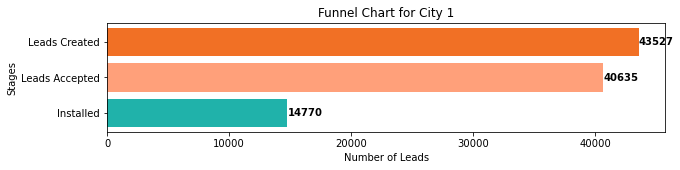

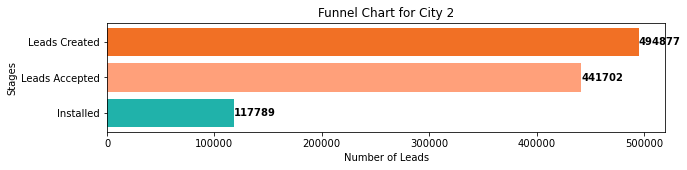

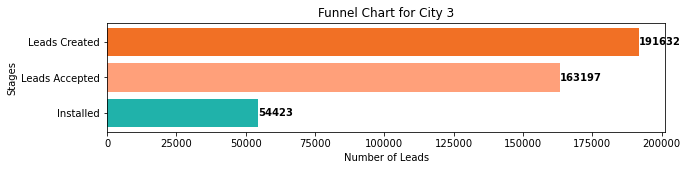

In [23]:
stages = ['Leads Created', 'Leads Accepted', 'Installed']

# Set up the colors for each stage
colors = ['#f17025', '#FFA07A', '#20B2AA']

# Create a funnel chart for each city
for i, row in funnel_data.iterrows():
    city = row['Lead City']
    values = [row['Leads_Created'], row['Leads_accepted'], row['Installed']]
    
    # Plotting the funnel chart
    plt.figure(figsize=(10, 2))
    plt.barh(stages, values, color=colors)
    
    # Add annotations
    for index, value in enumerate(values):
        plt.text(value, index, str(value), va='center', ha='left', fontweight='bold')
    
    # Set titles and labels
    plt.title(f'Funnel Chart for {city}')
    plt.xlabel('Number of Leads')
    plt.ylabel('Stages')
    
    # Show the chart
    plt.gca().invert_yaxis()  # Reverse the Y-axis to have the funnel shape
    plt.show()

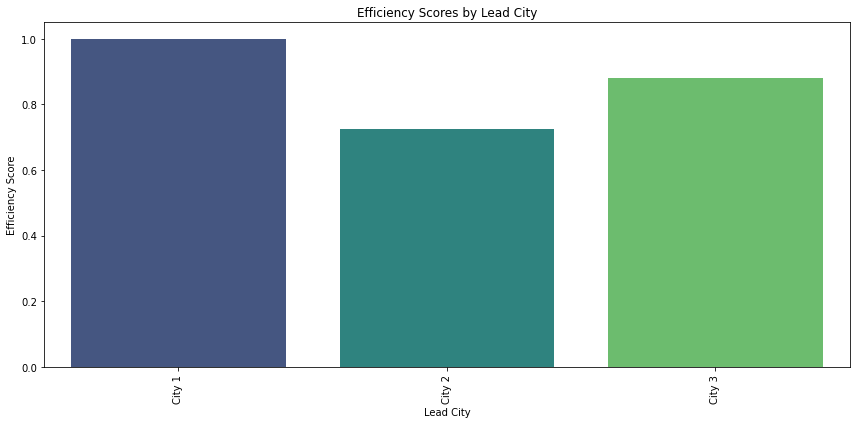

In [26]:
# Efficiency Scores Plot:
plt.figure(figsize=(12, 6))
sns.barplot(x='Lead City', y='Efficiency', data=results, palette='viridis')
plt.xticks(rotation=90)
plt.title('Efficiency Scores by Lead City')
plt.xlabel('Lead City')
plt.ylabel('Efficiency Score')
plt.tight_layout()
plt.show()


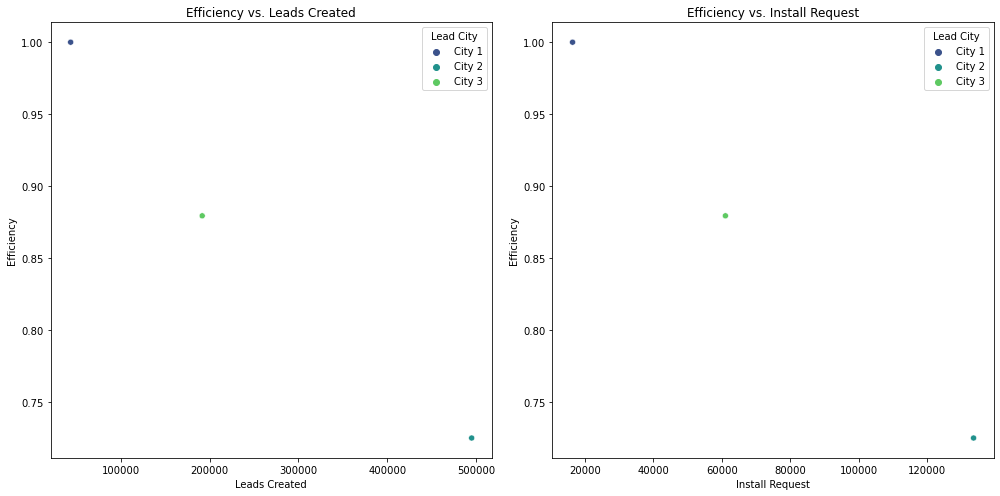

In [28]:
#Efficiency vs. Inputs and Outputs Scatter Plot:

plt.figure(figsize=(14, 7))

# Scatter plot for inputs
plt.subplot(1, 2, 1)
sns.scatterplot(x='Leads_Created', y='Efficiency', data=results, hue='Lead City', palette='viridis')
plt.title('Efficiency vs. Leads Created')
plt.xlabel('Leads Created')
plt.ylabel('Efficiency')

# Scatter plot for outputs
plt.subplot(1, 2, 2)
sns.scatterplot(x='Install_Request', y='Efficiency', data=results, hue='Lead City', palette='viridis')
plt.title('Efficiency vs. Install Request')
plt.xlabel('Install Request')
plt.ylabel('Efficiency')

plt.tight_layout()
plt.show()


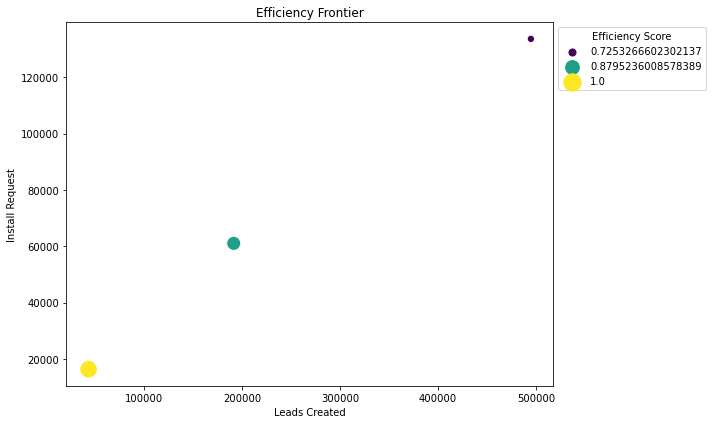

In [29]:
# Efficiency Frontiers Plot:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Leads_Created', y='Install_Request', size='Efficiency', hue='Efficiency', palette='viridis', data=results, sizes=(50, 300))
plt.title('Efficiency Frontier')
plt.xlabel('Leads Created')
plt.ylabel('Install Request')
plt.legend(title='Efficiency Score', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


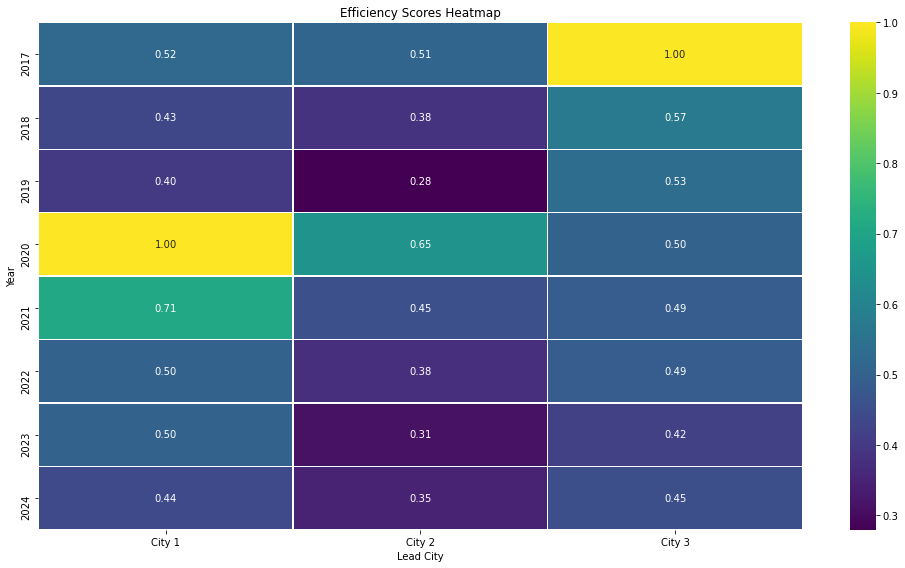

In [34]:
# Pivot the data for heatmap
heatmap_data = results.pivot('Year', 'Lead City', 'Efficiency')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Efficiency Scores Heatmap')
plt.xlabel('Lead City')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

In [32]:
print(results.columns)

Index(['Lead City', 'Leads_Created', 'Leads_accepted', 'Install_Request',
       'Installed', 'Efficiency'],
      dtype='object')


In [50]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
nodes = ['Analyze Customer Type', 'Optimize Processes', 'Segment by Region', 'Develop Training', 'Predictive Modeling', 'Continuous Monitoring']
G.add_nodes_from(nodes)

# Define edges (connections between nodes)
edges = [
    ('Analyze Customer Type', 'Optimize Processes'),
    ('Optimize Processes', 'Segment by Region'),
    ('Segment by Region', 'Develop Training'),
    ('Develop Training', 'Predictive Modeling'),
    ('Predictive Modeling', 'Continuous Monitoring')
]
G.add_edges_from(edges)

# Define positions for the nodes
pos = nx.spring_layout(G, seed=42)  # You can use different layouts like shell, circular, etc.

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
plt.title('Roadmap for Further Analysis and Implementation')
plt.show()

NetworkXError: random_state_index is incorrect